In [33]:
import glob
import cv2 as cv
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,MaxPool2D,InputLayer
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers import Dropout, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
import keras
import matplotlib.pyplot as plt
from keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [18]:
path='/Users/gerald/Documents/gautham/imagenet'
imageFolderName=[]

In [19]:
i=0
for filename in os.listdir(path):
    imageFolderName.append([filename,i])
    i+=1
    
print(len(imageFolderName))

22


In [39]:
images=[]
labels=[]
class_names=[]
for j in range(len(imageFolderName)):
    img_path = glob.glob(path+"/"+imageFolderName[j][0]+"/*.jpg")
    class_names.append(imageFolderName[j][0])
    for img in img_path:
        n=cv.imread(img)
         
        if(type(n) != 'NoneType'):
            n1 = cv.resize(n,(64,64))
            x = img_to_array(n1)
            images.append(x)
            labels.append(j)
    print(imageFolderName[j][0],imageFolderName[j][1])
    

apple 0
swimming trunks 1
tortoiseshell 2
ballet dancer 3
bulb 4
parallel 5
foe 6
white-throated sparrow 7
desert tortoise 8
jewelweed 9
duffel 10
pumpkin seed 11
jalousie 12
commelina 13
kittiwake 14
street 15
monkey 16
dining area 17
boxer 18
bottom 19
Indian elephant 20
dugout canoe 21


AttributeError: 'list' object has no attribute 'shape'

In [21]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.3, random_state=42)

In [22]:
train_images=np.array(train_images)
test_images=np.array(test_images)
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

In [23]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(8447, 64, 64, 3)
(8447,)
(3621, 64, 64, 3)
(3621,)


In [24]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [25]:
train_images=train_images/255.0
test_images=test_images/255.0

In [26]:
from sklearn.utils import shuffle
train_images, train_labels = shuffle(train_images, train_labels)

In [27]:
print(train_images[0].shape)

(64, 64, 3)


In [28]:
model = Sequential()

model.add(Conv2D(64, (5, 5),strides=(1,1),padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3),strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3),strides=(1,1), activation='relu'))
model.add(Dropout(0.2))


#model.add(Conv2D(32, (3, 3),strides=(1,1),padding='same', activation='relu', kernel_initializer='he_uniform'))
#model.add(Conv2D(32, (3, 3),strides=(1,1), activation='relu', kernel_initializer='he_uniform'))
#model.add(Conv2D(32, (3, 3),strides=(1,1), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(32, (3, 3),strides=(1,1), activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

# model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Flatten())
model.add(Dense(19, activation='softmax'))

model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 64, 64, 64)        4864      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 32)        18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 32)       

In [13]:
history=model.fit(train_images, train_labels, epochs=50,  validation_split = 0.1, batch_size = 500, verbose = 1, shuffle = 1)


Train on 5809 samples, validate on 646 samples
Epoch 1/50
5809/5809 [==============================] - 20s 3ms/step - loss: 3.1085 - accuracy: 0.0883 - val_loss: 2.9197 - val_accuracy: 0.0557
Epoch 2/50
5809/5809 [==============================] - 18s 3ms/step - loss: 2.6408 - accuracy: 0.1892 - val_loss: 2.8813 - val_accuracy: 0.1084
Epoch 3/50
5809/5809 [==============================] - 18s 3ms/step - loss: 2.3720 - accuracy: 0.2832 - val_loss: 2.8079 - val_accuracy: 0.1192
Epoch 4/50
5809/5809 [==============================] - 18s 3ms/step - loss: 2.1775 - accuracy: 0.3453 - val_loss: 2.6952 - val_accuracy: 0.1842
Epoch 5/50
5809/5809 [==============================] - 18s 3ms/step - loss: 2.0446 - accuracy: 0.3873 - val_loss: 2.6118 - val_accuracy: 0.2260
Epoch 6/50
5809/5809 [==============================] - 18s 3ms/step - loss: 1.9295 - accuracy: 0.4125 - val_loss: 2.5429 - val_accuracy: 0.2260
Epoch 7/50
5809/5809 [==============================] - 18s 3ms/step - loss: 1.840

In [14]:
score = model.evaluate(test_images, test_labels, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.5536366411611668
Test accuracy: 0.5822190046310425


Text(0.5, 0, 'epoch')

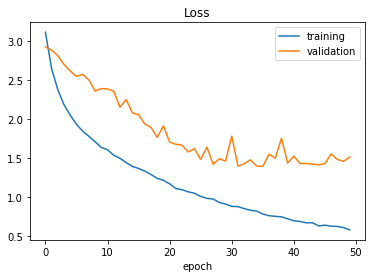

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

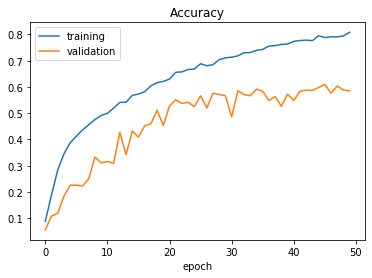

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
model.save('Part3_Model.h5')

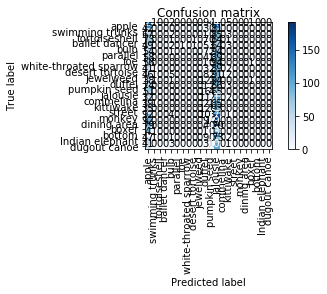

In [40]:
Y_pred = model.predict(test_images)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(test_labels,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx,class_names)

Observations:
1) We have used imagenet dataset to classify images into different category.

2) After training the model we are getting a accuracy of 58%. 

3) I have used 4 conv2d layers, a significant increase in accuracy was seen after usung Max Pooling and  Dropout of 0.5% probablity.

4) Our model does not seem to overfit or underfit but the performance can be definetly improved by changing the layers and increasing the epoch size.

5) I also tried implementing a smaller identical version of VGG16, but it ended up crashing my PC. The model is shown belows

# Smaller Identical Version of VGG16

In [15]:
model = Sequential()

model.add(Conv2D(input_shape=(64,64,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=19, activation="softmax"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)      

In [16]:
hist=model.fit(train_images, train_labels, epochs=50,  validation_split = 0.2, batch_size = 200, verbose = 1, shuffle = 1)

Train on 5164 samples, validate on 1291 samples
Epoch 1/50
5164/5164 [==============================] - 68s 13ms/step - loss: 2.9991 - accuracy: 0.0534 - val_loss: 2.9442 - val_accuracy: 0.0473
Epoch 2/50
5164/5164 [==============================] - 70s 14ms/step - loss: 2.9442 - accuracy: 0.0544 - val_loss: 2.9443 - val_accuracy: 0.0473
Epoch 3/50
5164/5164 [==============================] - 68s 13ms/step - loss: 2.9438 - accuracy: 0.0583 - val_loss: 2.9446 - val_accuracy: 0.0473
Epoch 4/50
5164/5164 [==============================] - 67s 13ms/step - loss: 2.9438 - accuracy: 0.0583 - val_loss: 2.9449 - val_accuracy: 0.0473
Epoch 5/50
5164/5164 [==============================] - 67s 13ms/step - loss: 2.9435 - accuracy: 0.0536 - val_loss: 2.9447 - val_accuracy: 0.0473
Epoch 6/50
3200/5164 [=================>............] - ETA: 24s - loss: 2.9435 - accuracy: 0.0613

KeyboardInterrupt: 